In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


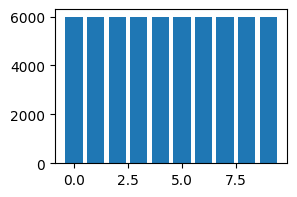

In [7]:
## 추가코드
def label_Unique(data):
  tmp=np.unique(data, return_counts=True)
  print(tmp)
  plt.figure(figsize=(3,2))
  plt.bar(tmp[0],tmp[1])
  plt.show()
label_Unique(train_labels)


In [8]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


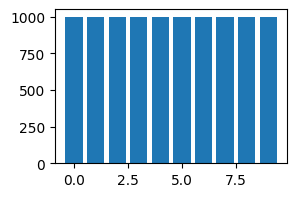

In [9]:
###########
## 추가코드
############
label_Unique(test_labels)

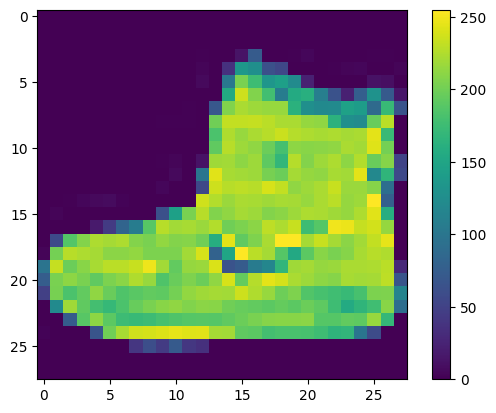

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
###########################3
## 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다.
# 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

train_images = train_images / 255.0
test_images = test_images / 255.0

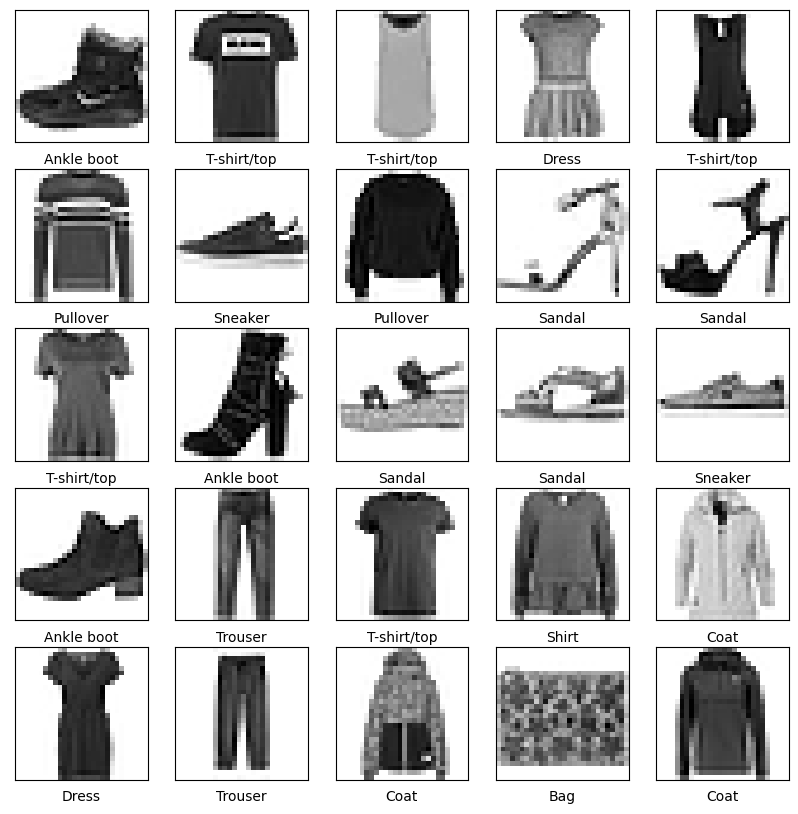

In [12]:
############################3
## 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해 보죠.
### 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
########################

# 층 설정
# 신경망의 기본 빌딩 블록은 레이어 입니다.
# 레이어는 레이어에 공급된 데이터로부터 표현을 추출합니다. 이러한 표현은 당면한 문제에 의미가 있어야 합니다.
# 대부분 딥러닝은 간단한 층을 연결하여 구성됩니다.
# tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


#############
# 모델 컴파일
# 모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 컴파일 단계에서 추가됩니다.

# 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
# 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
# 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




In [14]:
#########
## 모델저장
###
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

hist=model.fit(train_images, train_labels,
               epochs=10,
               validation_data=(test_images, test_labels),callbacks=[checkpointer])


Epoch 1/10
1857/1875 [============================>.] - ETA: 0s - loss: 0.5054 - accuracy: 0.8244
Epoch 1: saving model to ./model\01-0.8532.hdf5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5046 - accuracy: 0.8248 - val_loss: 0.4247 - val_accuracy: 0.8532
Epoch 2/10
1844/1875 [============================>.] - ETA: 0s - loss: 0.3797 - accuracy: 0.8627
Epoch 2: saving model to ./model\02-0.8594.hdf5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3794 - accuracy: 0.8629 - val_loss: 0.4189 - val_accuracy: 0.8594
Epoch 3/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.3409 - accuracy: 0.8754
Epoch 3: saving model to ./model\03-0.8658.hdf5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3411 - accuracy: 0.8754 - val_loss: 0.3817 - val_accuracy: 0.8658
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.3194 - accuracy: 0.8830
Epoch 4: saving model to ./model\04-0.8593.hdf5
1875/1875 [======

In [15]:
best_model = model.load_weights('./model/08-0.8831.hdf5')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3330 - accuracy: 0.8831 - 289ms/epoch - 925us/step

Test accuracy: 0.8830999732017517


In [18]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

313/313 [==============================] - 0s 743us/step


array([9.4171163e-08, 8.6200131e-09, 2.9639168e-08, 2.2628630e-07,
       5.7828225e-07, 4.4459605e-04, 1.0287164e-06, 1.5022722e-03,
       2.0949588e-07, 9.9805093e-01], dtype=float32)

In [19]:
#####################33
## 이 예측은 10개의 숫자 배열로 나타납니다.
### 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다.
## 가장 높은 신뢰도를 가진 레이블을 찾아보죠:

np.argmax(predictions[0])

9

In [51]:
idx = np.where(train_labels==6)
idx[0]

array([   18,    32,    33, ..., 59973, 59987, 59988], dtype=int64)

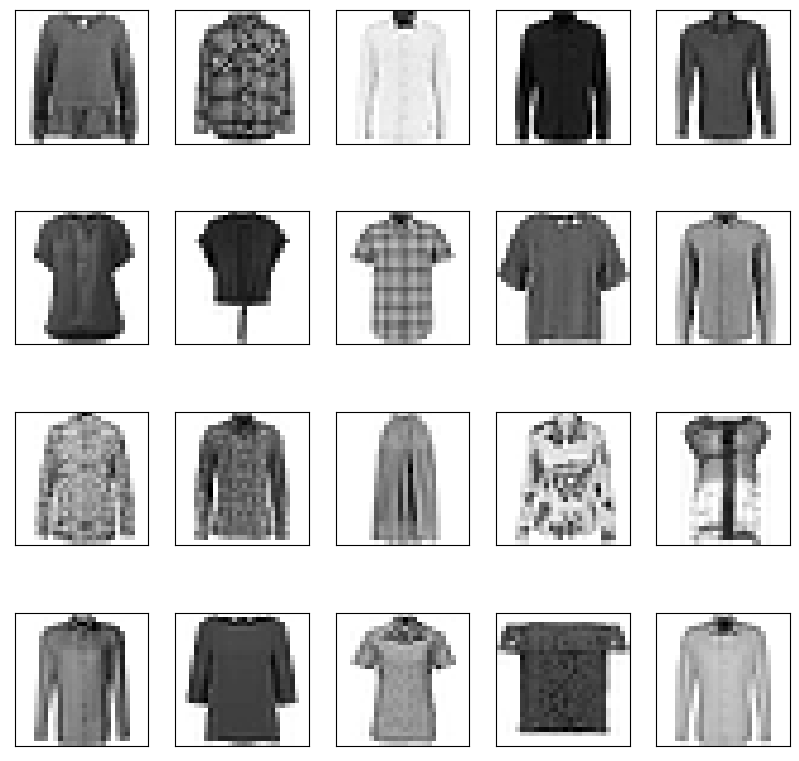

In [52]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx[0][i]], cmap=plt.cm.binary)
plt.show()

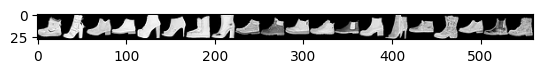

In [32]:
img = np.hstack(train_images[idx[0][:20]])
plt.imshow(img, cmap='gray')

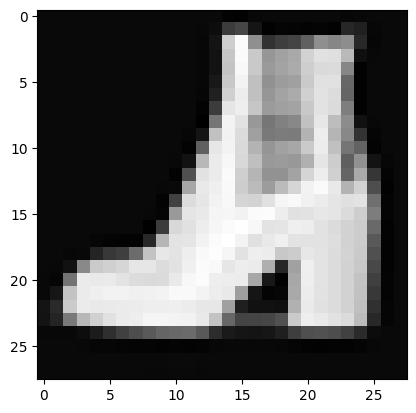

In [63]:
from PIL import Image
img = Image.open('../../data/img/ankle_boots.png').resize((28, 28)).convert('L')
img = img.transpose(Image.FLIP_LEFT_RIGHT)
img = (255-np.array(img))/255
plt.imshow(img, cmap='gray')

In [66]:
predictions = probability_model.predict(img)
class_names[np.argmax(predictions[0])]

1/1 [==============================] - 0s 15ms/step


'Ankle boot'

In [67]:
class_names[3]

'Dress'